In [1]:
# pip imports
#!pip install keras;
#!pip install tensorflow;
#!pip install pandas;
#!pip install numpy;
#!pip install pydot;
#!pip install graphviz;

# import pandas
import pandas as pd

# import numpy
import numpy as np

# import tensorflow
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
# Link that solved import issue -- https://stackoverflow.com/questions/43990046/tensorflow-blas-gemm-launch-failed

# import modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# Configuration options
feature_vector_length = 17
num_classes = 7

In [3]:
#read data and normalize it
df1 = pd.read_csv('Chemical Composion of Ceramic.csv', delimiter=',')
df = (df1-df1.mean())/df1.std()
df.head()

<ipython-input-3-545a414a3c93>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = (df1-df1.mean())/df1.std()


,Al2O3,CaO,Ceramic Name,CuO,Fe2O3,K2O,MgO,MnO,Na2O,P2O5,PbO2,Rb2O,SiO2,SrO,TiO2,Y2O3,ZnO,ZrO2
0,0.456921,-0.896887,NaN,-1.094910,-0.631485,-0.157378,-0.233054,-0.307290,0.425185,-0.871491,-1.072717,1.712455,0.785980,-0.893243,-0.584880,-0.229398,-0.747488,-1.089550
1,0.792846,-0.855083,NaN,-0.571257,-0.730777,0.001809,0.185492,-0.714297,0.281828,-0.821820,0.055559,1.712455,0.096169,-0.932272,-0.210557,-0.229398,-0.452515,-0.756632
2,0.242183,-0.869018,NaN,-0.571257,-0.813521,-1.715141,-1.116652,-0.649176,0.052456,-0.598303,0.431651,0.996219,1.769869,-0.737125,-0.772041,-0.229398,-1.337433,-1.089550
3,0.116743,-0.906177,NaN,-0.571257,-0.548741,-1.101132,-0.605095,-0.584055,1.199315,-0.573468,0.807743,0.996219,1.584709,-0.854213,-0.210557,-0.229398,-0.747488,-1.256009
4,0.201787,-0.817924,NaN,0.476048,-0.614936,-0.737275,-0.326064,-0.714297,-1.266433,-0.722479,0.055559,0.709725,1.512097,-0.854213,-0.959203,-1.005822,-0.157542,-1.089550


In [4]:
# split into input (X) and output (y) variables
X = df.iloc[:, np.r_[0:2, 3:18]] #include columns 0-18 except 3
y = df1.iloc[:, 0] #3rd column is included from original dataset

# convert dataframe into x and y arrays
X = X.to_numpy()
y = y.to_numpy()

# reshape input data
X = X.reshape(X.shape[0], feature_vector_length)
# convert class strings into categorical numbers 0-6
lst = []
for i in y:
    if i == 'FLQ':
        lst.append(0) 
    if i == 'DY-BS':
        lst.append(1)
    if i == 'DY-NS':
        lst.append(2)
    if i == 'DY-Y':
        lst.append(3)
    if i == 'DY-M':
        lst.append(4)
    if i == 'DY-QC':
        lst.append(5)
    if i == 'FL':
        lst.append(6)
y = np.array(lst)

print("Input Shape: {}".format(X.shape)) #should be column width of 17 of 88 rows
print("Output Shape: {}".format(y.shape)) #1 column for ceramic name 

Input Shape: (88, 17)
Output Shape: (88,)


Text(0, 0.5, 'Variance Ratio')

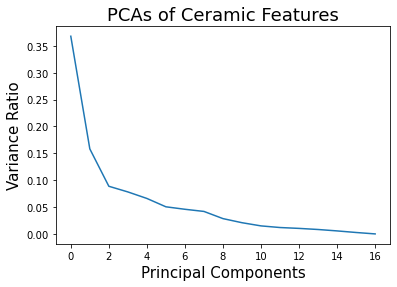

In [5]:
X_pca = PCA().fit(X)
plt.plot(X_pca.explained_variance_ratio_)
plt.title('PCAs of Ceramic Features', fontsize=18)
plt.xlabel('Principal Components', fontsize=15)
plt.ylabel('Variance Ratio', fontsize=15)
#print(X_pca.explained_variance_ratio_[0], X_pca.explained_variance_ratio_[4]) 1/17

(88, 2)


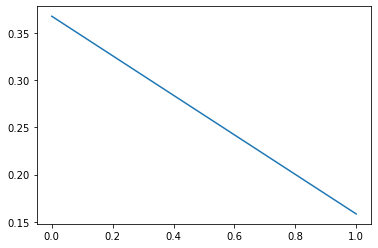

In [6]:
X_pca = PCA(n_components=2).fit(X)
X_pca_transform = X_pca.transform(X)
print(X_pca_transform.shape) 
plt.plot(X_pca.explained_variance_ratio_)

In [7]:
principal_X_Df = pd.DataFrame(data = X_pca_transform, columns = ['principal component 1', 'principal component 2'])
principal_X_Df.head()

,principal component 1,principal component 2
0,-0.907036,-2.749685
1,-1.403477,-1.795609
2,-0.647910,-2.948825
3,-0.710224,-2.723071
4,-0.309567,-1.897783


<Figure size 432x288 with 0 Axes>

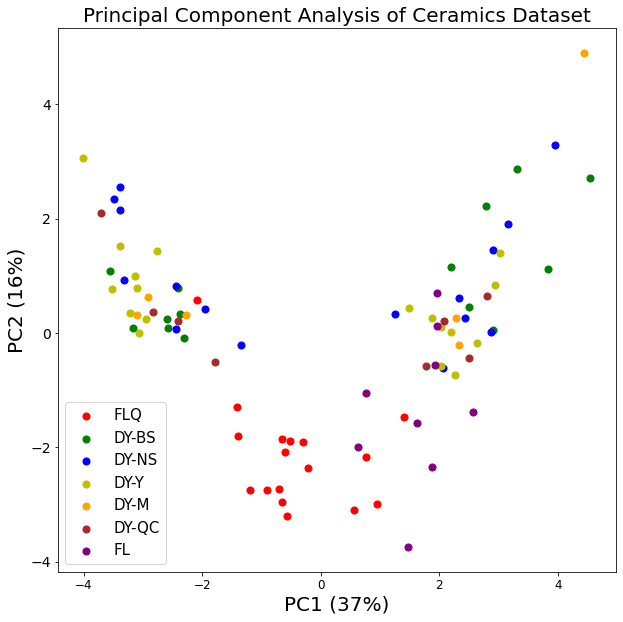

In [8]:
# plot PCA
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC1 (37%)', fontsize=20)
plt.ylabel('PC2 (16%)', fontsize=20)
plt.title("Principal Component Analysis of Ceramics Dataset",fontsize=20)
targets = ['FLQ','DY-BS','DY-NS','DY-Y','DY-M','DY-QC','FL']
colors = ['r', 'g','b', 'y', 'orange', 'brown', 'purple']
for target, color in zip(targets,colors):
    indicesToKeep = df1['Ceramic Name'] == target
    plt.scatter(principal_X_Df.loc[indicesToKeep, 'principal component 1'], principal_X_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
    
plt.legend(targets,prop={'size':15})

In [9]:
#convert target classes to binary
y = to_categorical(y, num_classes)

In [10]:
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

Feature shape: (17,)


In [32]:
#!pip install eli5
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import eli5
from eli5.sklearn import PermutationImportance

reg = linear_model.LinearRegression()
model = reg.fit(X,y)
perm = PermutationImportance(reg, random_state=1).fit(X,y)
eli5.show_weights(perm)

Weight,Feature
1200.2671 ± 241.0749,x0
1018.3514 ± 171.0625,x1
450.7657 ± 88.6217,x11
44.4835 ± 11.8499,x4
21.7721 ± 4.6675,x3
7.1683 ± 1.0577,x7
2.8423 ± 0.5007,x5
0.5429 ± 0.1014,x12
0.2737 ± 0.0884,x10
0.1434 ± 0.0165,x13


In [12]:
# Create the model
model = Sequential()
model.add(Dense(500, input_dim=feature_vector_length, activation='relu'))
model.add(Dense(450, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(350, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

print(X.shape)
print(y.shape)

(88, 17)
(88, 7)


In [27]:
# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X, y, epochs=100, batch_size=150, verbose=1, validation_split=0.2)
#perm = PermutationImportance(model, random_state=1).fit(X,y)
#eli5.show_weights(perm)

Epoch 1/100
1/1 [==============================] - 1s 620ms/step - loss: 3.2629e-06 - accuracy: 1.0000 - val_loss: 28.6513 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 31ms/step - loss: 1.9533e-06 - accuracy: 1.0000 - val_loss: 28.8515 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 30ms/step - loss: 1.1376e-06 - accuracy: 1.0000 - val_loss: 29.0615 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 30ms/step - loss: 6.9141e-07 - accuracy: 1.0000 - val_loss: 29.2849 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 34ms/step - loss: 4.3937e-07 - accuracy: 1.0000 - val_loss: 29.5177 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 32ms/step - loss: 2.8610e-07 - accuracy: 1.0000 - val_loss: 29.7533 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 34ms/step - loss: 1.9244e-07 - accuracy: 1.0000 - v

In [14]:
# Test the model after training
test_results = model.evaluate(X, y, verbose=1)
print(f'Test results - Loss: {test_results[0]*100} - Accuracy: {test_results[1]*100}%')

3/3 [==============================] - 0s 2ms/step - loss: 7.8789 - accuracy: 0.7955
Test results - Loss: 787.8890514373779 - Accuracy: 79.54545617103577%


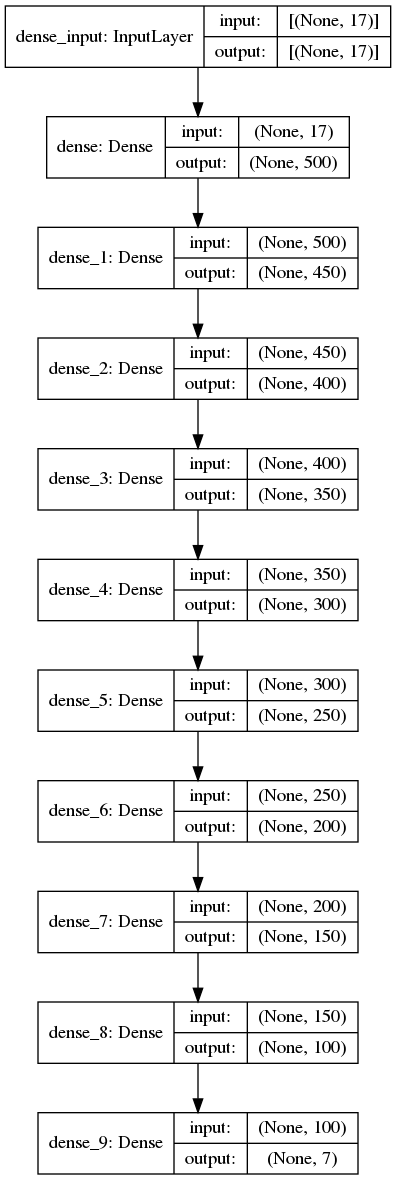

In [15]:
# Plot the model's schematic
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)